<a href="https://colab.research.google.com/github/rahmanziaur/EDGEICT/blob/main/Zia_RF_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is from [Kaggle](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)

Random Forest Classifier Tutorial with Python
Hello friends,

Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this kernel, I build two Random Forest Classifier models to predict the safety of the car, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the feature selection process using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy.

As always, I hope you find this kernel useful and your UPVOTES would be highly appreciated.


Table of Contents
Introduction to Random Forest algorithm
Random Forest algorithm intuition
Advantages and disadvantages of Random Forest algorithm
Feature selection with Random Forests
Difference between Random Forests and Decision-Trees
Relationship to nearest neighbours
Import libraries
Import dataset
Exploratory data analysis
Declare feature vector and target variable
Split data into separate training and test set
Feature engineering
Random Forest Classifier model with default parameters
Random Forest Classifier model with parameter n_estimators=100
Find important features with Random Forest model
Visualize the feature scores of the features
Build the Random Forest model on selected features
Confusion matrix
Classification report
Results and conclusion
References
1. Introduction to Random Forest algorithm
Table of Contents

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

2. Random Forest algorithm intuition
Table of Contents

Random forest algorithm intuition can be divided into two stages.

In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:-

Randomly select k features from a total of m features where k < m.
Among the k features, calculate the node d using the best split point.
Split the node into daughter nodes using the best split.
Repeat 1 to 3 steps until l number of nodes has been reached.
Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.
In the second stage, we make predictions using the trained random forest algorithm.

We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
Then, we calculate the votes for each predicted target.
Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.
Random Forest algorithm intuition
Random Forest

3. Advantages and disadvantages of Random Forest algorithm
Table of Contents

The advantages of Random forest algorithm are as follows:-

Random forest algorithm can be used to solve both classification and regression problems.
It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.
The disadvantages of Random Forest algorithm are listed below:-

The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.
4. Feature selection with Random Forests
Table of Contents

Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.

We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest.

The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.

Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.

5. Difference between Random Forests and Decision Trees
Table of Contents

I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

Random forests is a set of multiple decision-trees.

Decision-trees are computationally faster as compared to random forests.

Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

6. Relationship to nearest neighbours
Table of Contents

A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. It turns out that both can be viewed as so-called weighted neighbourhoods schemes. These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.

7. Import libraries ¶


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

100%|██████████| 4.66k/4.66k [00:00<00:00, 8.52MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1


In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/DTClassifierTest/refs/heads/main/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape


(1727, 7)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [10]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

In [12]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [14]:
# check data types in X_train

X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [16]:
# import category encoders

import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

In [18]:
!pip install category_encoders

  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.7 MB/s eta 0:00:00


In [20]:
import category_encoders as ce

# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [23]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


In [24]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.9649


In [25]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.291657
persons,0.235380
buying,0.160692
maint,0.134143
lug_boot,0.111595
doors,0.066533


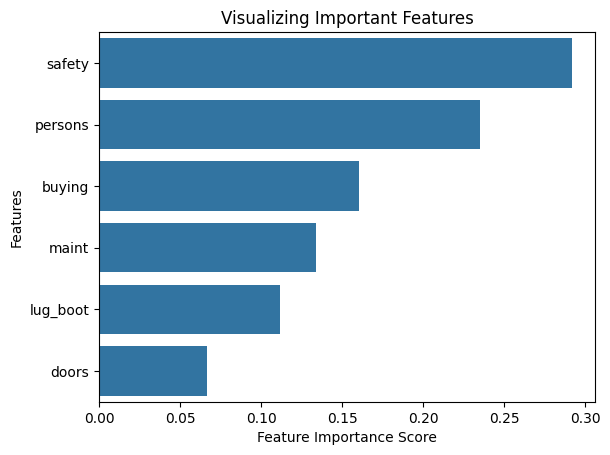

In [27]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [30]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [31]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [32]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [33]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


In [34]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



Source: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial